<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-08-09<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节6.2.1）

<img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true" width="200"/>

* [Lennard-Jones势](#LJ)
* [Python实现](#Python)
    * [1. 原始势能表达式](#potential)
    * [2. 原始受力表达式](#force)
    * [3. 势场的截断](#cutoff)
    * [4. 截断后势能表达式](#potcutoff)
    * [5. 截断后受力表达式](#forcecutoff)
* [参考](#references)

<a name="LJ"></a>
# Lennard-Jones势

Lennard-Jones势是描述非键合原子和分子之间的相互作用的一种经验势。这种势常用于模拟稀有气体和其他简单分子的性质。其数学形式相对简单，但足以捕捉真实系统中观察到的原子或分子之间的排斥和吸引相互作用。Lennard-Jones势（LJ势）是一个数学上简单的模型，用于近似中性原子或分子对之间的相互作用。Lennard-Jones势的函数形式为：

\begin{equation}
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
\end{equation}

其中：
- $ V(r) $ 是势能，
- $r $ 是粒子之间的距离，
- $ \epsilon $ 是势能阱的深度，
- $ \sigma $ 是粒子间势为零的有限距离。

在该势能函数中，$\left( \frac{\sigma}{r} \right)^{12}$ 项描述了当两个原子或分子非常接近时的强烈排斥作用，这是由于电子云重叠和Pauli排斥原理引起的。而$\left( \frac{\sigma}{r} \right)^{6}$ 项描述了两个原子或分子之间的吸引作用，这通常是由于即时偶极产生的范德华斯力导致的。

尽管Lennard-Jones势是一种非常简化的势，但它已被广泛用于多种模拟中，尤其是在描述稀有气体和初步研究液体和固体的性质时。




<a name ='Python'></a>
# Python实现

<a name="potential"></a>
### 1. 原始势能表达式
首先，我们定义了一个名为 `lennard_jones_potential` 的函数来计算两个粒子之间的Lennard-Jones势能。

$$V(r) = 4 \varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]$$

其中：
- $V(r)$  是作为分离距离 $r$ 的函数的势能。
- $\varepsilon$  是势阱的深度。
- $\sigma$  是两个粒子之间的势能为零的有限距离。
- $r$  是两个粒子之间的距离。



In [ ]:
def lennard_jones_potential(r, epsilon, sigma):
    """
    Calculate the Lennard-Jones potential between two particles.

    Parameters:
    - r (float): Distance between the two particles.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.

    Returns:
    - V (float): Lennard-Jones potential.
    """
    V = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
    return V


在这之后，我们为图形定义了一些参数。我们选择了一个任意的势阱深度 $ \varepsilon = 1.0 $ 和一个任意的 $ \sigma = 1.0 $ 值。我们还定义了一个范围的 $ r $ 值，从 $ 0.9 \times \sigma $ 到 $ 3 \times \sigma $。

接下来，我们使用 `matplotlib` 来绘制Lennard-Jones势能图。在图中，蓝色线表示势能与距离的关系。红色虚线表示 $ \sigma $ 的位置，这是势能为零的位置。

图表的结论：
- 在距离接近 $ \sigma $ 的地方，势能达到最小值。
- 当两个粒子之间的距离 $ r $ 增加时，势能趋于零，表示两个粒子之间没有相互作用。
- 对于小于 $ \sigma $ 的距离，势能急剧上升，表示两个粒子之间存在强烈的排斥力。


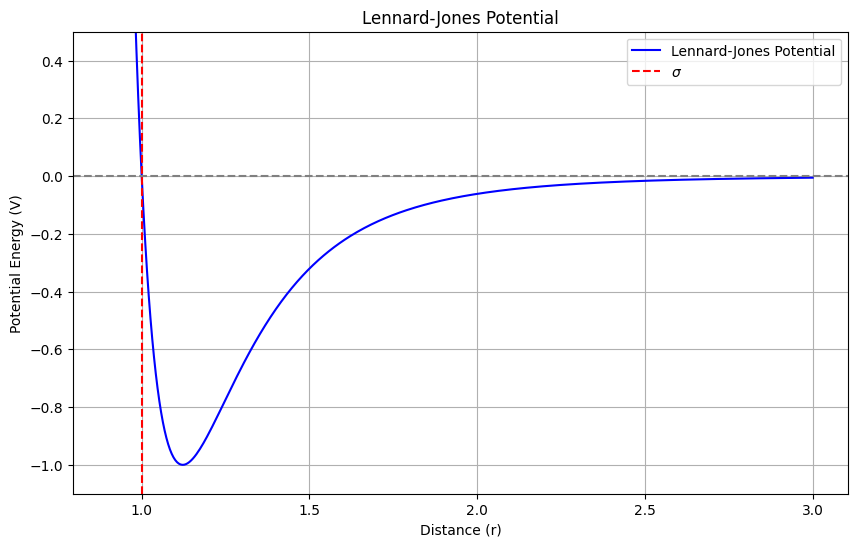

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the plot
epsilon = 1.0  # arbitrary unit
sigma = 1.0    # arbitrary unit
r_values = np.linspace(0.9*sigma, 3*sigma, 400)  # We avoid starting from zero to prevent division by zero
V_values = [lennard_jones_potential(r, epsilon, sigma) for r in r_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, label="Lennard-Jones Potential", color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(sigma, color='red', linestyle='--', label=r'$\sigma$')
plt.title("Lennard-Jones Potential")
plt.xlabel("Distance (r)")
plt.ylabel("Potential Energy (V)")
plt.ylim([-1.1, 0.5])
plt.legend()
plt.grid(True)
plt.show()


<a name="force"></a>
### 2. 原始受力表达式


对于`LJForceField`，原子2作用在原子1上的力为：

$$
F = 24 * \frac{\epsilon}{r^2} * \left(2 \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right) r_{\text{vec}}
$$

其中

$$r_{\text{VEC}}=r_1-r_2$$，这也是程序中的位移。



In [ ]:
import numpy as np

def lennard_jones_force_vector(r_vector, epsilon, sigma):
    """
    Calculate the Lennard-Jones force vector between two particles.

    Parameters:
    - r_vector (list or numpy array): 3D vector representing the distance from particle 2 to particle 1.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.

    Returns:
    - F_vector (numpy array): 3D Lennard-Jones force vector.
    """
    r_magnitude = np.linalg.norm(r_vector)
    F_magnitude = 24 * epsilon * ((2 * (sigma / r_magnitude)**12) - (sigma / r_magnitude)**6) / r_magnitude

    F_vector = (r_vector / r_magnitude) * F_magnitude
    return F_vector


In [ ]:
# Define test parameters
epsilon_test = 1.0
sigma_test = 1.0

# Test the function with a sample vector
# particle 1 is at (0.0, 0.0, 0.0) and particle 2 at (-1.1, 0.0, 0.0)
test_vector = np.array([1.0, 0.0, 0.0])
lennard_jones_force_vector(test_vector, epsilon_test, sigma_test)

array([24.,  0.,  0.])

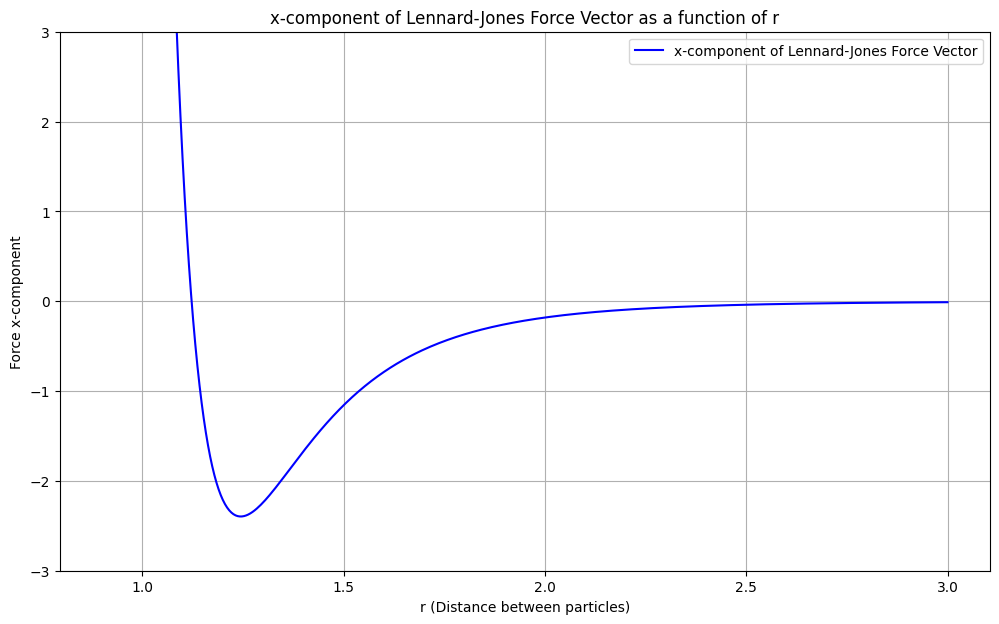

In [ ]:
# Compute the first component of the force vector for r_vector values ranging from [0.9, 0, 0] to [3.0, 0, 0]
r_values_force = np.linspace(0.9, 3.0, 400)
force_x_values = [lennard_jones_force_vector([r, 0, 0], 1.0, 1.0)[0] for r in r_values_force]

# Plotting the x-component of the force vector with updated y-axis limits
plt.figure(figsize=(12, 7))
plt.plot(r_values_force, force_x_values, label='x-component of Lennard-Jones Force Vector', color='blue')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Force x-component')
plt.ylim([-3, 3])  # Setting the y-axis limits
plt.legend()
plt.title('x-component of Lennard-Jones Force Vector as a function of r')
plt.grid(True)
plt.show()





<a name="cutoff"></a>
### 3. 势场的截断

Lennard-Jones (LJ) 势是用于描述原子或分子间非键合相互作用的简化模型。在分子动力学模拟中，为了提高效率，通常会在某一截断半径内考虑势能的影响，而忽略超出这一范围的势能效应。但简单地在给定的截断距离截断势能可能会引入不连续性，从而影响模拟的准确性。

为了解决这个问题，通常会使用平滑的截断方案，其中cosine截断是其中之一。cosine截断方法在接近截断半径时平滑地使势能下降到零，从而避免了势能的突然变化。

具体来说，cosine截断可以定义为：

$$ f(r) = \frac{1}{2} \left(1 - \cos\left(\pi \frac{r_c -r}{r_c-r_s}\right)\right) $$

其中，$ f(r) $ 是修正因子，当 $ r $ 在 $ r_s $ 和 $ r_c $ 之间时，它将Lennard-Jones势平滑地从其完整值过渡到零。这里，$ r_c $ 是截断半径，而 $ r_s $ 是一个用户定义的参数，描述了过渡区域的起始点。



In [ ]:
def compute_switching_function(r, switching_start, cutoff_distance):
    """
    Compute the switching function value based on the distance between two particles.

    Parameters
    ----------
    r : float
        Distance between two particles.
    switching_start : float
        Distance where the switching function starts.
    cutoff_distance : float
        Cutoff distance for the potential.

    Returns
    -------
    float
        The value of the switching function at distance r.
    """
    # Check the distance against the switching start and cutoff distance
    if r < switching_start:
        return 1.0
    elif r > cutoff_distance:
        return 0.0

    # Compute the normalized distance within the switching interval
    # t=1 when r=switching_start;  t=0 when r=cutoff_distance
    t = (cutoff_distance - r) / (cutoff_distance - switching_start)

    # Compute the switching function based on the chosen method

    return 0.5 * (1 - np.cos(np.pi * t))


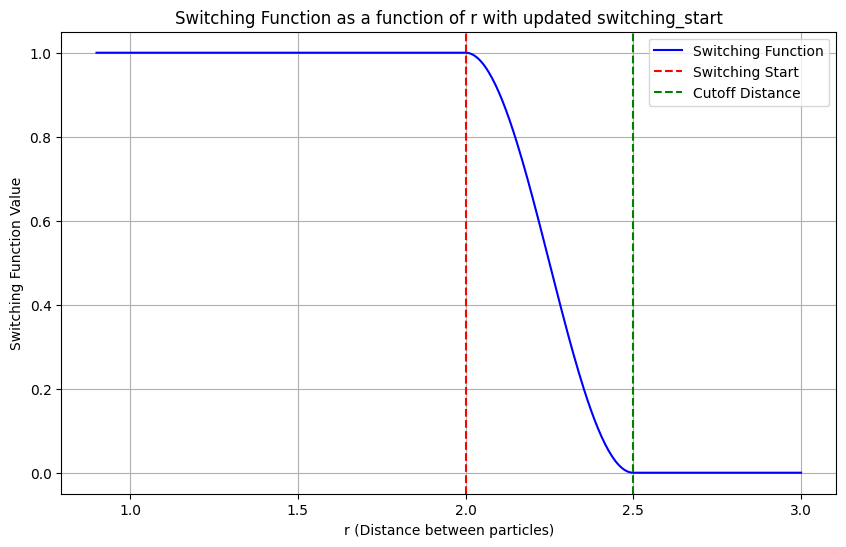

In [ ]:
# Update switching_start value
switching_start = 2.0
cutoff_distance = 2.5

# Recompute switching function values
switching_values = [compute_switching_function(r, switching_start, cutoff_distance) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, switching_values, label='Switching Function', color='blue')
plt.axvline(x=switching_start, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='green', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Switching Function Value')
plt.legend()
plt.title('Switching Function as a function of r with updated switching_start')
plt.grid(True)
plt.show()


<a name="potcutoff"></a>
### 4. 截断后势能表达式

利用cos修正因子，带有cosine截断的Lennard-Jones势可以写为：

$$ V_{\text{cosine}}(r) = f(r) \times 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]$$

当 $ r $ 大于 $ r_c $ 时，$ V_{\text{cosine}}(r) $ 为零。

cosine截断不仅可以保证势能和力在截断半径处的连续性，还能在某些情况下提高模拟的准确性，尤其是当液体或气体系统的密度较低时。

In [ ]:
def lennard_jones_potential_with_cutoff(r, epsilon, sigma, switching_start, cutoff_distance):
    """
    Calculate the Lennard-Jones potential between two particles with cutoff.

    Parameters:
    - r (float): Distance between the two particles.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.
    - switching_start : float
        Distance where the switching function starts.
    - cutoff_distance : float
        Cutoff distance for the potential.

    Returns:
    - V (float): Lennard-Jones potential with cutoff.
    """
    V = lennard_jones_potential(r, epsilon, sigma)*compute_switching_function(r, switching_start, cutoff_distance)
    return V

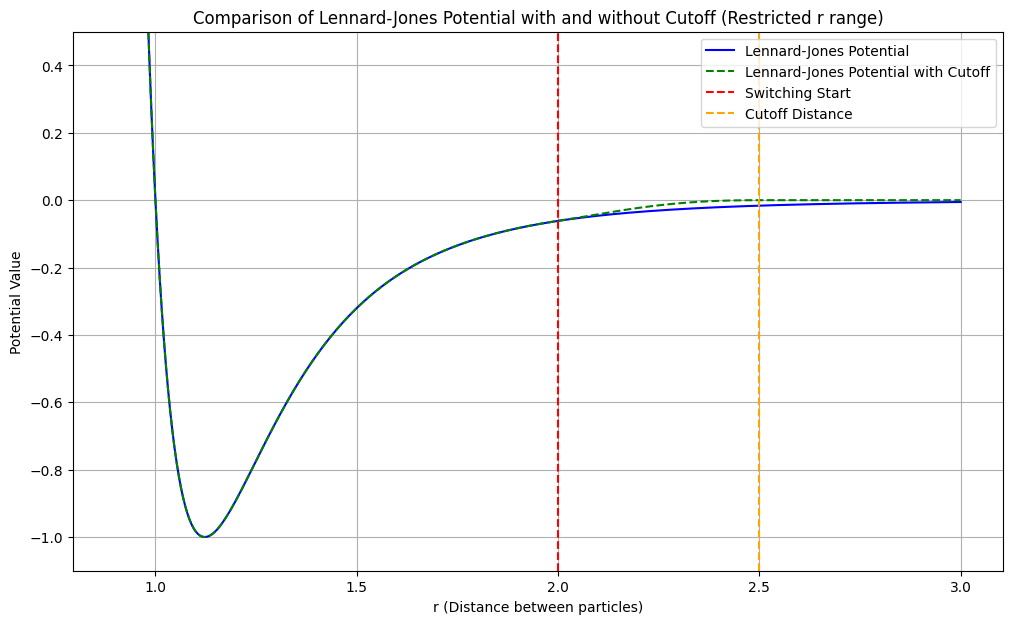

In [ ]:
# Redefine r_values to be within the interval [0.9, 3]
r_values_restricted = np.linspace(0.9, 3, 400)

# Recompute Lennard-Jones potential values for the new r_values
lj_values_restricted = [lennard_jones_potential(r, epsilon_test, sigma_test) for r in r_values_restricted]
lj_with_cutoff_values_restricted = [lennard_jones_potential_with_cutoff(r, epsilon_test, sigma_test, switching_start, 2.5) for r in r_values_restricted]

plt.figure(figsize=(12, 7))
plt.plot(r_values_restricted, lj_values_restricted, label='Lennard-Jones Potential', color='blue')
plt.plot(r_values_restricted, lj_with_cutoff_values_restricted, label='Lennard-Jones Potential with Cutoff', color='green', linestyle='--')
plt.axvline(x=switching_start, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='orange', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Potential Value')
plt.ylim([-1.1,0.5])
plt.legend()
plt.title('Comparison of Lennard-Jones Potential with and without Cutoff (Restricted r range)')
plt.grid(True)
plt.show()


<a name="forcecutoff"></a>
### 5. 截断后受力表达式

Switching function（或切换函数）在分子动力学中常用于势能的截断处理，确保在截断距离附近势能和力平滑地趋近于零，从而避免不连续性和相关的数值问题。

给定一个切换函数 $ S(r) $，当我们考虑势能的计算时，不仅需要知道 $ S(r) $ 的值，还需要知道其对于原子间距离 $ r $ 的导数，因为力是势能关于距离的导数。具体地说，势能函数 $ V(r) $ 对应的力 $ F(r) $ 可以表示为：

$$ F(r) = -\frac{dV(r)}{dr} $$

如果我们有一个截断处理后的势能 $ V_{\text{mod}}(r) = V(r) \times S(r) $，其中 $ V(r) $ 是原始的未经截断的势能，那么对应的力可以表示为：

$$ F_{\text{mod}}(r) = -\frac{d(V(r) \times S(r))}{dr} $$

为了计算上述导数，我们需要同时考虑 $ V(r) $ 和 $ S(r) $ 的导数。特别是，我们需要知道切换函数 $ S(r) $ 对于 $ r $ 的导数，因为这影响了计算出的力的值。总的来说，了解切换函数的导数在分子动力学模拟中是至关重要的，因为它直接影响到计算得到的原子间的力，这些力决定了原子的运动轨迹和模拟的动力学性质。

Cosine切换函数是分子动力学中用于势能截断的一种常见方法。它的主要优点是在截断距离附近提供平滑的过渡，以避免在原子间势能和力中的不连续性。

设定一个截断距离 $ r_c $，在 $ r \leq r_{\text{start}} $ 时，势能保持不变，而在 $ r_{\text{start}} < r \leq r_c $ 之间，势能开始经过cosine切换函数平滑地趋向于0。

Cosine切换函数的一种常见形式为：
$$ S(r) = \frac{1}{2} \left(1 - \cos\left(\pi \frac{r_c - r}{r_c - r_{\text{start}}}\right)\right) $$

当 $ r \leq r_{\text{start}} $ 时，$ S(r) = 1 $；
当 $ r > r_c $ 时，$ S(r) = 0 $。

对于上述切换函数，其对 $ r $ 的导数是：
$$ \frac{dS(r)}{dr} = -\frac{\pi}{2(r_c - r_{\text{start}})} \sin\left(\pi \frac{r_c - r}{r_c - r_{\text{start}}}\right) $$

这个导数是计算在截断范围内原子间的力时必要的，因为力是势能相对于距离的导数。

使用cosine切换函数及其导数，可以确保在截断距离附近势能和力都是平滑的，这是在分子动力学模拟中避免不物理的行为和数值不稳定性的关键。

In [ ]:
def compute_switching_derivative(r, switching_start, cutoff_distance):
    """
    Compute the derivative of the switching function based on the distance between two particles.

    Parameters
    ----------
    r : float
        Distance between two particles.
    switching_start : float
        Distance where the switching function starts.
    cutoff_distance : float
        Cutoff distance for the potential.

    Returns
    -------
    float
        The derivative of the switching function at distance r.
    """

    if r < switching_start or r > cutoff_distance:
        return 0.0
    else:
        return -0.5 * (np.pi / (cutoff_distance - switching_start)) * np.sin(np.pi * (cutoff_distance - r) / (cutoff_distance - switching_start))


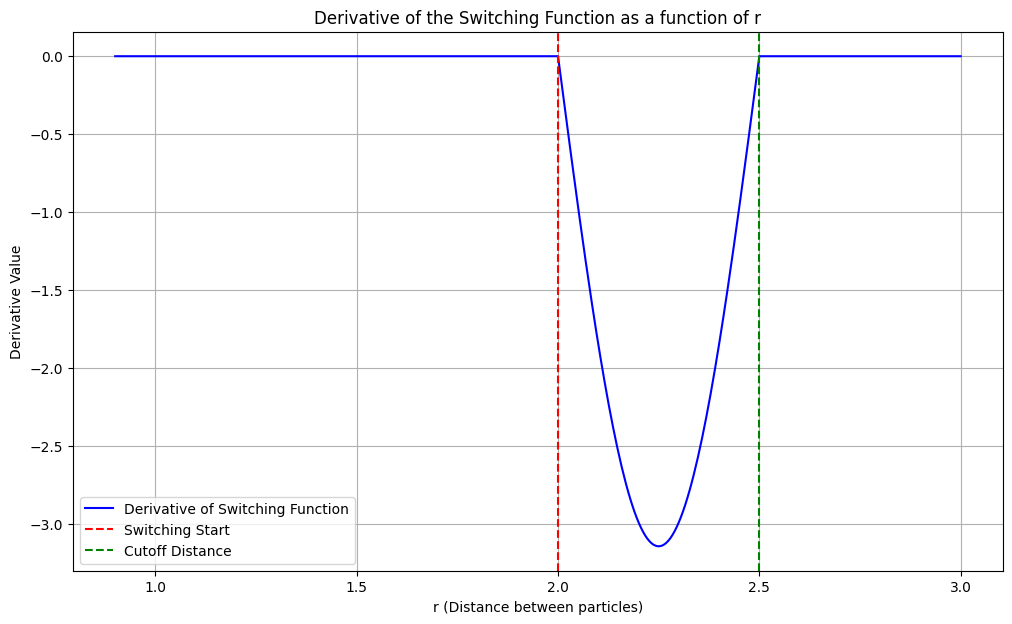

In [ ]:
# Generate values for the derivative of the switching function
r_values_derivative = np.linspace(0.9, 3, 400)
switching_derivative_values = [compute_switching_derivative(r, 2.0, 2.5) for r in r_values_derivative]

plt.figure(figsize=(12, 7))
plt.plot(r_values_derivative, switching_derivative_values, label='Derivative of Switching Function', color='blue')
plt.axvline(x=2.0, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='green', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Derivative Value')
plt.legend()
plt.title('Derivative of the Switching Function as a function of r')
plt.grid(True)
plt.show()


接下来我们就可以计算有截断项情况下的受力

$$ F_{\text{mod}}(r) = -\frac{d(V(r) \times S(r))}{dr} $$

In [ ]:
def lennard_jones_force_vector_with_cutoff(r_vector, epsilon, sigma, switching_start, cutoff_distance):
    """
    Compute the Lennard-Jones force on a given particle due to all of its neighboring particles,
    considering the cutoff.

    Parameters
    ----------

    Returns
    -------
    net_force : np.array
        The total force exerted on the target particle.
    """
    net_force = np.zeros_like(r_vector, dtype=float)

    r_magnitude = np.linalg.norm(r_vector)

    if r_magnitude <= cutoff_distance:
        # Compute force without considering cutoff
        force_magnitude = 24 * epsilon * ((2 * (sigma / r_magnitude)**12) - (sigma / r_magnitude)**6) / r_magnitude

        switching_value =compute_switching_function(r_magnitude, switching_start, cutoff_distance)
        switching_derivative = compute_switching_derivative(r_magnitude, switching_start, cutoff_distance)
        force_magnitude *= switching_value
        # Add extra force due to derivative of switching function
        force_magnitude -= switching_derivative * 4 * epsilon * ((sigma / r_magnitude)**12 - (sigma / r_magnitude)**6)

        # Add force vector to total force
        net_force = force_magnitude * (r_vector / r_magnitude)

    return net_force

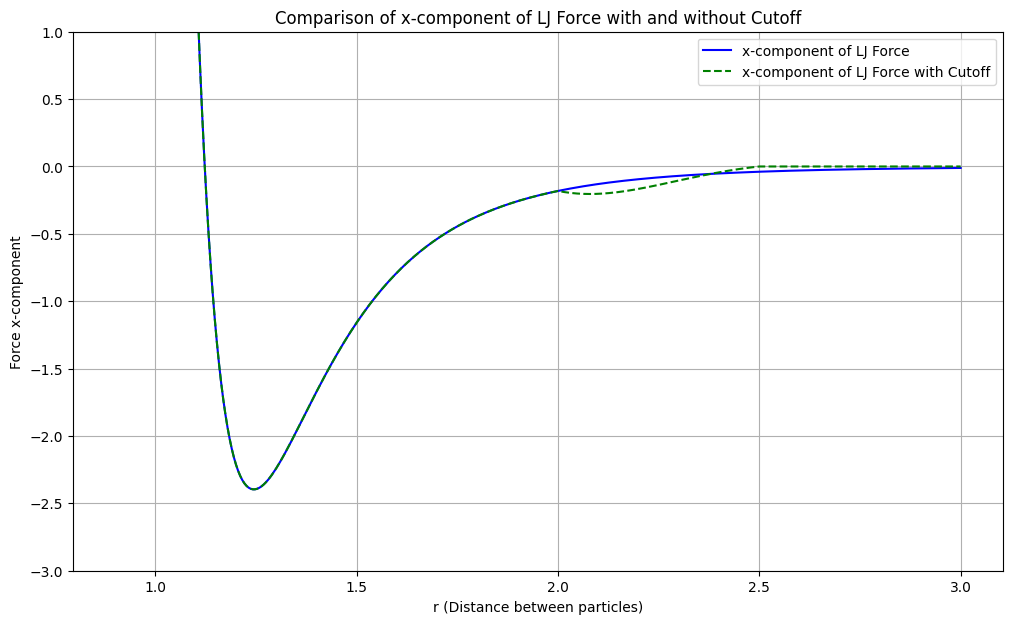

In [ ]:
# Compute the first component of the net force vector for r_vector values ranging from [0.9, 0, 0] to [3.0, 0, 0]
r_values_force = np.linspace(0.9, 3.0, 400)
force_x_with_cutoff_values = [lennard_jones_force_vector_with_cutoff(np.array([r, 0, 0]), 1.0, 1.0, 2.0, 2.5)[0] for r in r_values_force]

plt.figure(figsize=(12, 7))
plt.plot(r_values_force, force_x_values, label='x-component of LJ Force', color='blue')
plt.plot(r_values_force, force_x_with_cutoff_values, label='x-component of LJ Force with Cutoff', color='green', linestyle='--')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Force x-component')
plt.ylim([-3, 1])  # Setting the y-axis limits
plt.legend()
plt.title('Comparison of x-component of LJ Force with and without Cutoff')
plt.grid(True)
plt.show()


<a name = "references"></a>
### 讲解视频

- https://www.bilibili.com/video/BV1oz4y1W7fN/
- https://www.bilibili.com/video/BV19z4y1W7ZR/
- https://www.bilibili.com/video/BV1qP411p7qK/